圖片

In [ ]:
import cv2
import numpy as np
import IPython.display as dp           # colab
from google.colab.patches import cv2_imshow   # colab

In [ ]:
# pic= cv2.imread("圖片路徑", 讀取方式) 1 一般不含透明度 / 0 灰階 / -1 完整含透明度
pic= cv2.imread("cat.jpg",-1)
cv2_imshow(pic)

In [ ]:
# 第一維   高
# 第二維   寬
# 第三維   色彩


In [ ]:
#　色彩空間   imread 僅支援順序 BGR

# pic= cv2.cvtColor(圖片變數, 轉換類型)
# cv2.COLOR_BGR2HSV
# cv2.COLOR_BGR2GRAY
# cv2.COLOR_HSV2BGR
# cv2.COLOR_GRAY2BGR

pic= cv2.imread("cat.jpg",1)
pic_convert= cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
cv2_imshow(pic_convert)

In [ ]:
# 儲存圖片
# cv2.imwrite("圖片路徑", 圖片變數, 設定參數)  # 設定參數不一定需要
# jpg 的設定可以加在參數上，cv2.IMWRITE_JPEG_QUALITY,畫質比率(0-100)

pic= cv2.imread("cat.jpg",1)
pic_convert= cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

cv2.imwrite("/content/cat_gray.jpg", pic_convert, [cv2.IMWRITE_JPEG_QUALITY, 0])
# 畫質稍微變差

# 印出傳轉換後的圖片
pic= cv2.imread("cat_gray.jpg",1)
cv2_imshow(pic)

In [ ]:
# OpenCV 是以numpy 記錄圖片，所以創造一個空矩陣=創造一張空圖片
# 變數= np.full( (維度數), 初始值, 陣列型態(通常為np.uint8) )

first_img= np.full((200,200,3), (90,150,180), np.uint8)
cv2_imshow(first_img)

In [ ]:
# 畫出特定圖案

first_img= np.full((200,200,3), (90,150,180), np.uint8)

cv2.line(first_img, (10,10), (100,100), (255,255,255), 5)
# 直線(檔名,起點,終點,顏色,粗細)

cv2.rectangle(first_img, (50,50), (180,180), (255,255,255), 5)
# 正方形(檔名,左上點,右下點,顏色,粗細)

cv2.circle(first_img, (100,100), 50, (255,255,255), 5)
# 圓形(檔名,圓心,半徑,顏色,粗細)
# 正方形，圓形，最後設置-1 會變成實心圖案


cv2_imshow(first_img)

In [ ]:
from PIL import ImageFont, ImageDraw, Image

first_img= np.full((200,200,3), (90,150,180), np.uint8)

test_pi= Image.fromarray(first_img)
# 將opencv轉換成pillow檔案

font= ImageFont.truetype("/content/font_testing.ttf", 25)
# 字體格式(文字檔, 大小)

ImageDraw.Draw(test_pi).text((25,25), "測試用字體", (255,255,255), font)
# text( (文字位置), 文字內容, 顏色, 字體格式)

first_img= np.array(test_pi)
# 再將 pillow 檔案，轉換回　opencv　檔案

cv2_imshow(first_img)

動畫

In [ ]:
import time
# import time (sleep) 函示庫

for x in range(0,300,2):
    # 設定連續數字
    dp.clear_output(True)
    # 等待上一張圖片消失，在顯示下一張圖片
    first_img= np.full((500,500,3), (90,150,180), np.uint8)
    test_pi= Image.fromarray(first_img)
    font= ImageFont.truetype("/content/font_testing.ttf", x)
    ImageDraw.Draw(test_pi).text((5,x), "測試用字體", (255,255,255), font)
    first_img= np.array(test_pi)
    cv2_imshow(first_img)
    time.sleep(0.03)
    # 每張圖片間隔時間

In [ ]:
# 影片儲存
# 控制變數= cv2.VideoWriter(檔案路徑,影片格式,每秒幀數,大小(寬,高))

# 影片格式設定
# cv2.VideoWriter_fourcc(*"編碼格式")   編碼格式: MP4V, XVID

# 寫入影片影格
# 控制變數= write(圖像變數)

# 釋放控制變數
# 控制變數.release()


In [ ]:
# 影片儲存

video_format= cv2.VideoWriter_fourcc(*"MP4V")
# 設定影片格式
video_1= cv2.VideoWriter("/content/testing.mp4",video_format,30,(500,500))


for x in range(0,300,2):
    # dp.clear_output(True)
    # 已經不是圖片，所以不需要此段
    first_img= np.full((500,500,3), (90,150,180), np.uint8)
    test_pi= Image.fromarray(first_img)
    font= ImageFont.truetype("/content/font_testing.ttf", x)
    ImageDraw.Draw(test_pi).text((5,x), "測試用字體", (255,255,255), font)
    first_img= np.array(test_pi)
    # cv2_imshow(first_img)
    video_1.write(first_img)
    # 每一張圖片都寫入
    # time.sleep(0.03)
    # 上方video 已經設置影片間隔，所以這段不需要
video_1.release()
# 告知系統，影片結束，關閉影片

In [ ]:
# 影片播放

# 檔案類型轉換
ffmpeg -i 來源檔案 -vcodec libx264 目標檔案

# 將影片檔案轉成base64格式
base64.b64encode(檔案內容).decode()

# 顯示影片撥放器
dp.HTML(
    f'<video src="data:video/mp4;base64,{影片}"controls/>'
)

In [ ]:
# 檔案類型轉換
!ffmpeg -i testing.mp4 -vcodec libx264 testing_f.mp4

# 將原本的檔案，轉換成 libx264   整合音軌

In [ ]:
# 將影片檔案轉成base64格式 & 顯示影片撥放器
# 轉換成 base64 為了將二進制數據轉換為文本格式，以便在網路上傳輸
import codecs, base64

with codecs.open("testing_f.mp4", "rb") as f:
    video= base64.b64encode(f.read()).decode()

dp.HTML(
    f'<video src="data:video/mp4;base64,{video}"controls/>'
)

In [ ]:
# 影片讀取

# 取得影像來源
控制變數= cv2.VideoCapture(來源)   # 來源: 輸入檔案路徑，則讀取指定的影片檔案

# 判斷影像來源是否有開啟
變數= 控制變數.isOpened()

# 取得影像
變數一, 變數二= 控制變數.read()
# 變數一，如果有讀取到畫面，會顯示True / 否則False
# 變數二，讀取到的畫面變數

# 取得來源資訊
控制變數.get(參數)
# 1 -> 當前的影格
# 3 -> 影像寬度
# 4 -> 影像高度
# 5 -> 每秒的影格數
# 7 -> 影片的總影格數

# 設定來源資訊
控制變數.set(參數,設定)

In [ ]:
read_video= cv2.VideoCapture("testing_f.mp4")

while read_video.isOpened()== True:
    response, img= read_video.read()
    if response== True:
        cv2_imshow(img)
    else:
        break

In [ ]:
# 取得影片資訊
print(read_video.get(7))   # 依照指定參數，取得影片資訊

# 設定資訊，只用在當前影格，作用: 可以讓影片從特定影格數開始撥放
# read_vide.set(1,100)    # 從影格100開始撥放

作業練習

In [ ]:
import numpy as np
import cv2
import IPython.display as dp
from PIL import Image
import time
# import


# homework_img= np.full((600,600,3), (125,125,0), np.uint8)
# 創造圖片


# cv2.rectangle(homework_img, (25,300), (50,325), (255,255,255), -1)
# cv2_imshow(homework_img)
# 在原圖上創造矩陣


x= 25
# 矩陣起點
y= "right"
# 矩陣起始方向

while True:
    if x<= 575 and y== "right":
        x= x + 7
    elif x> 575 and y== "right":
        y = "left"
    elif y== "left" and x> 0:
        x = x - 7
    elif y== "left" and x< 0:
        y = "right"

    homework_img= np.full((600,600,3), (125,125,0), np.uint8)
    dp.clear_output(True)

    cv2.rectangle(homework_img, (x,300), (x+25,325), (255,255,255), -1)

    homework_pi= Image.fromarray(homework_img)
    # to pillow 檔
    homework_img= np.array(homework_pi)
    # to opencv 檔

    cv2_imshow(homework_img)
    time.sleep(0.03)



透過加減乘除調整顏色

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
# import


img_1= cv2.imread("cat.jpg",1)
# 讀取圖片

img_2= np.full(img_1.shape, 50, np.uint8)
# 創造與img_1相同大小的圖片

img_add= cv2.add(img_1, img_2)
# 相加，最大值為255，白色

img_add_2= cv2.add(img_1, (50,50,50,50))
# 簡化寫法，直接加上BGR三的顏色數值與一個透明度 (此圖無透明度，所以第四個數值不影響圖片)


img_sub= cv2.subtract(img_1, img_2)
# 減法，用法與加法差不多


img_adsdiff= cv2.absdiff(img_1, img_2)
# 絕對值運算，避免直接變成黑色 (數值變成0)

cv2_imshow(img_adsdiff)

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
# import

img_1= cv2.imread("cat.jpg",1)
# 讀取圖片

img_2= np.full(img_1.shape, 50, np.uint8)
# 創造與img_1相同大小的圖片

img_divide= cv2.divide(img_1, img_2)
# 除法 (幅度較劇烈)

img_multiply= cv2.multiply(img_1, img_2)
# 乘法 (幅度較劇烈)

img_bit= cv2.bitwise_not(img_1)
# 求反運算，會產生像素不同的圖

cv2_imshow(img_bit)

翻轉 & 百葉窗效果 (間隔取值)

In [ ]:
# 圖片變換 
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
# import

img_1= cv2.imread("cat.jpg",1)
# 讀取圖片

img_2= cv2.resize(img_1, (650,150))  # (寬,高)
print(img_2.shape)            # (高,寬)



img_flip= cv2.flip(img_1, 1)
# 翻轉, 1左右翻轉, 0上下翻轉, -1上下左右皆翻轉

# 旋轉
# 變換矩陣= cv2.getRotationMatrix2D(旋轉中心,角度, 縮放比率)
# 旋轉圖像= cv2.warpAffine(圖像變數, 變換矩陣, 輸出的圖像大小 (寬高))

convert_array= cv2.getRotationMatrix2D((300,300), 45, 1)
img_rotate= cv2.warpAffine(img_1, convert_array, (700,700))

cv2_imshow(img_rotate)

In [ ]:
# 圖片裁切 & 貼上   
# (可以直接使用numpy的功能)
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
# import

img_1= cv2.imread("cat.jpg",1)
img_2= cv2.imread("cat.jpg",1)
# 讀取圖片

img_cut= img_1[200:400, 150:450]

# img_2[100:250,100:250]=img_1[200:350,200:350]

img_2[100:250:2,100:250:2]=img_1[200:350:2,200:350:2]
# 跳著取，可以造成間隔效果


cv2_imshow(img_cut)
cv2_imshow(img_2)


白平衡

In [ ]:
# 白平衡   (白平衡公式在老師講義中)
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
# import

img_1= cv2.imread("cat.jpg",1)

Bavg= img_1[:,:,0].mean()
Gavg= img_1[:,:,1].mean()
Ravg= img_1[:,:,2].mean()   # 各個顏色的平均值

img_2= img_1.copy()       # 複製一張原圖

img_2[:,:,0]= cv2.multiply(img_1[:,:,0], ((Bavg+Gavg+Ravg)/(Bavg*3)))
img_2[:,:,1]= cv2.multiply(img_1[:,:,1], ((Bavg+Gavg+Ravg)/(Gavg*3)))
img_2[:,:,2]= cv2.multiply(img_1[:,:,2], ((Bavg+Gavg+Ravg)/(Ravg*3))) 
# 此部分是白平衡公式

cv2_imshow(img_1)
cv2_imshow(img_2)


二值化

In [ ]:
# 二值化
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
# import

img_1= cv2.imread("cat.jpg",1)

# threshold, img_2= cv2.threshold(img_1, 門檻值, 最大值, "")
# 左側第一變數，回傳門檻值
# 左側第二變數，新的圖像
# 第一變數,欲處理圖片
# 第二變數,門檻值
# 第三變數，最大值
# 方法:
# cv2.THRESH_BINARY    超過閥值,直接為最大值；小於則為0
# cv2.THRESH_BINARY_INV  超過閥值,則為0, 小於則為最大值
# cv2.THRESH_OTSU     自動計算門檻值，此方法僅接受灰階圖

threshold, img_2= cv2.threshold(img_1, 125, 255, cv2.THRESH_BINARY)
cv2_imshow(img_2)

# 使用cv2.THRESH_OTSU

img_2= img_1.copy()
threshold, img_2[:,:,0]= cv2.threshold(img_1[:,:,0], 127,255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
threshold, img_2[:,:,1]= cv2.threshold(img_1[:,:,1], 127,255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
threshold, img_2[:,:,2]= cv2.threshold(img_1[:,:,2], 127,255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
cv2_imshow(img_2)

In [ ]:
# 將圖片以區塊的方式，進行二值化
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
# import

img_1= cv2.imread("cat.jpg",1)

# img_2[:,:,0]= cv2.adaptiveThreshold(圖像變數,最大值,方法一,方法二,區塊大小,微調值)
# 方法一 cv2.ADAPTIVE_THRESH_MEAN_C     計算各區塊內平均值，再減微調值
# 方法一 cv2.ADAPTIVE_THRESH_GAUSSIAN_C   個區塊內高斯加權平均，再減微調值
# 方法二同上兩種閥值

img_2= img_1.copy()
img_2[:,:,0]= cv2.adaptiveThreshold(img_1[:,:,0],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)
img_2[:,:,1]= cv2.adaptiveThreshold(img_1[:,:,1],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)
img_2[:,:,2]= cv2.adaptiveThreshold(img_1[:,:,2],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)

cv2_imshow(img_2)

邊緣識別，銳化，模糊化

In [ ]:
# 邊緣識別 & 模糊化
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img_1= cv2.imread("cat.jpg",1)

img_canny= cv2.Canny(img_1, 20, 60)
print("邊緣識別")
cv2_imshow(img_canny)
# 邊緣識別

img_blur= cv2.blur(img_1,(20,20))
print("平均模糊")
cv2_imshow(img_blur)
# 平均值模糊法，在特定範圍內找出平均值，然後以該平均值對整張圖模糊化處理

img_blur2= cv2.medianBlur(img_1,(21))
print("中位數模糊")
cv2_imshow(img_blur2)
# 中位數模糊法，以中位數對整張圖模糊化處理 (因為取中位數，數值需為單數)

In [ ]:
# 影像銳利化
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img_1= cv2.imread("cat.jpg",1)

img_sharp= img_1.copy()
img_sharp[:,:,0]= cv2.equalizeHist(img_1[:,:,0])
img_sharp[:,:,1]= cv2.equalizeHist(img_1[:,:,1])
img_sharp[:,:,2]= cv2.equalizeHist(img_1[:,:,2])
# 此法也只能用於灰階圖，所以單獨處理

cv2_imshow(img_sharp)

In [ ]:
# 形態學 (侵蝕 & 膨脹)
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img_1= cv2.imread("cat.jpg",1)

# 侵蝕 (色彩度低的侵蝕色彩度高的)
# img_erode= cv2.erode(欲處理圖像, 結構陣列)
img_erode= cv2.erode(img_1, np.ones((5,5)))
cv2_imshow(img_erode)
# 結構陣列的大小，會影響強度，形狀也會影響產出效果


# 膨脹 (色彩度高的侵蝕色彩度低的)
img_dilate= cv2.dilate(img_1, np.ones((5,5)))  #(高，寬)   #cv 先寬再高 np 先高再寬
cv2_imshow(img_dilate)

# 膨脹與侵蝕的運用   (先膨脹or先侵蝕， 需依照雜訊與背景亮度比較)
# 先膨脹，可以讓背景把畫面上小的東西去除
# 去除掉之後，可以在讓深色的東西侵蝕回來

# 以下函式，可以同時做到膨脹與消除

# 結果圖像= cv2.morphologyEx(欲處理圖像, 方法, 結構陣列)
# 方法: cv2.MORPH_OPEN 先侵蝕後膨脹
# 方法: cv2.MORPH_CLOSE 先膨脹後侵蝕
# 方法: cv2.MORPH_GRADIENT 執行膨脹與新時產生的變化差
 
img_2= cv2.morphologyEx(img_1, cv2.MORPH_OPEN, np.ones((6,1)))
cv2_imshow(img_2)

Inrange

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img_1= cv2.imread("cat.jpg",1)

img_2= cv2.inRange(img_1, (110,110,110), (180,180,180))
# 在 range 範圍內，會變為白色，否則為黑色

cv2_imshow(img_1)
cv2_imshow(img_2)

作業練習

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

img1= cv2.imread("target.png",1)

img2= cv2.subtract(img1, (255,255,0,0))
img3= cv2.absdiff(img2, (0,0,255,0))
img4= cv2.multiply(img3, (0,0,255,0))

img5= cv2.subtract(img1, (0,255,255,0))
img6= cv2.absdiff(img5, (0,0,255,0))
img7= cv2.multiply(img6, (255,0,0,0))

img8= cv2.subtract(img1, (255,0,255,0))
img9= cv2.absdiff(img8, (0,0,255,0))
img10= cv2.multiply(img9, (0,255,0,0))


img11= cv2.add(img4,img7)
img12= cv2.add(img11,img10)

img_edit= cv2.morphologyEx(img12, cv2.MORPH_CLOSE, np.ones((2,2)))
cv2_imshow(img_edit)

取得輪廓 & 繪製輪廓

In [ ]:
import cv2
import IPython.display as dp
import numpy as np
from google.colab.patches import cv2_imshow

m1= cv2.imread("3.jpg",0) 
# 以二維方式讀取

m2= np.full((m1.shape[0], m1.shape[1], 3), 255, np.uint8)
# 創立一個大小與m1相等，三維的圖片(彩色)

a, b= cv2.findContours(m1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# a 全部輪廓變數(多維陣列):第一維指向不同輪廓,第二維指向該輪廓的所有輪廓點
#              :第三維指向第四維(無意義),第四維指向各個輪廓點的xy
# b 輪廓階層資料(多維陣列):第一維無意義,第二維指向各個輪廓,第三維有四個值
#              :第三維[相鄰的上一個輪廓,相鄰的下一個輪廓,被包覆的第一個輪廓,包覆他的輪廓]
# -1則代表沒有
#
# 第二參數:類型
#        cv2.RETR_EXTERNAL：只儲存最外層的輪廓
#        cv2.RETR_LIST：儲存所有輪廓，但不建立階層資料
#        cv2.RETR_CCOMP：儲存所有輪廓，但階層資料只包留兩層
#        cv2.RETR_TREE：儲存所有輪廓與其對應的階層資料   (通常用此)
# 
# 第三參數:方法
#        cv2.CHAIN_APPROX_NONE：儲存所有輪廓點   (通常用此)
#        cv2.CHAIN_APPROX_SIMPLE：簡化輪廓點，一條線只儲存頭尾

cv2.drawContours(m2, a, -1, (0,0,255), 2)
# 第一參數:畫到哪一個圖像
# 第二參數:存取全部輪廓變數
# 第三參數:要繪製的輪廓索引，通常使用-1，代表全部
# 第四參數:顏色 (tuple)
# 第五餐數:粗細

cv2_imshow(m2)

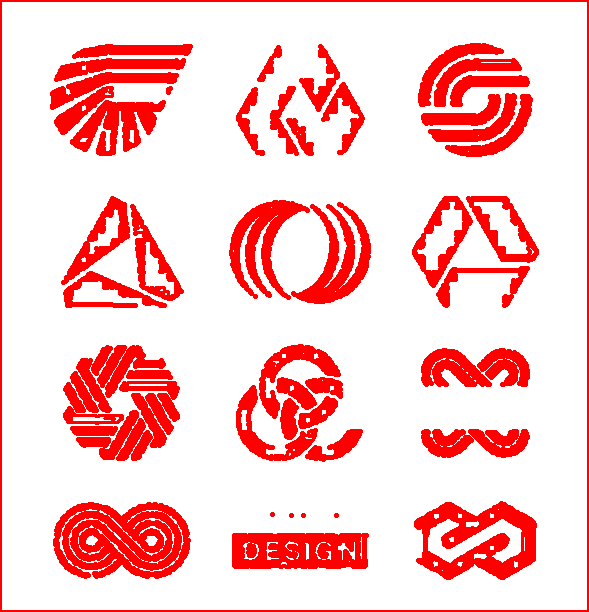

In [ ]:
# 練習凱留貓貓
import cv2
import IPython.display as dp
import numpy as np
from google.colab.patches import cv2_imshow

m1= cv2.imread("cat.jpg",0)
# 以二維方式讀取 (灰階圖)

# 如果灰階圖仍抓不到輪廓，需要將圖轉成黑白

# 法一
# th, m1= cv2.threshold(m1, 100, 255, cv2.THRESH_BINARY)
# 法二
# m1= cv2.inRange(m1, 180, 255)

m2= np.full((m1.shape[0], m1.shape[1], 3), 255, np.uint8)


a, b= cv2.findContours(m1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


cv2.drawContours(m2, a, -1, (0,0,255), 2)
# 第一參數:畫到哪一個圖像
# 第二參數:存取全部輪廓變數
# 第三參數:要繪製的輪廓索引，通常使用-1，代表全部
# 第四參數:顏色 (tuple)
# 第五餐數:粗細


cv2_imshow(m1)
cv2_imshow(m2)

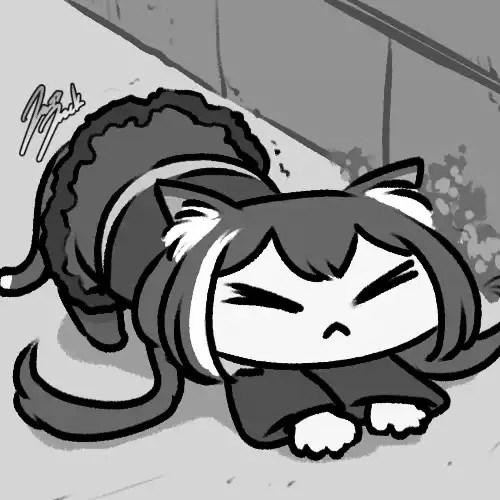
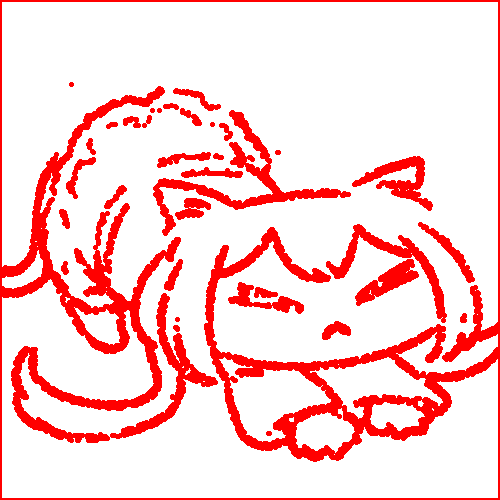

利用矩形，將輪廓物體匡列

In [ ]:
# 利用正方形，將輪廓抓出來
import cv2
import IPython.display as dp
import numpy as np
from google.colab.patches import cv2_imshow

m1= cv2.imread("3.jpg",0)
m2= np.full((m1.shape[0], m1.shape[1], 3), 255, np.uint8)

m3= m1.copy()
m3= cv2.cvtColor(m3, cv2.COLOR_GRAY2BGR)
# 思序4: 侵蝕膨脹前，先複製圖像，以利後續將矩形套用到正常圖像上

# 思序2: 侵蝕膨脹
m1=cv2.morphologyEx(m1,cv2.MORPH_OPEN,np.ones((40,40)))


a, b= cv2.findContours(m1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# cv2.drawContours(m2, a, -1, (0,0,255), 2)

for i in range(0,len(a)):
    x,y,w,h= cv2.boundingRect(a[i])
    # 利用for迴圈，抓取每一個輪廓
    cv2.rectangle(m3, (x,y), (x+w,y+h), (0,0,255), 2)
    # 畫矩形，左上起點xy，右下終點

cv2_imshow(m3)
# 思序1: m2畫出來後，發現因太過密集，無法識別，所以可以再用侵蝕膨脹，讓圖形較好識別
# 思序3: 經過侵蝕膨脹後，矩形識別物體效果較好，但想要將矩形畫在原本的圖形上
# 思序4: 創造新的圖，並將矩形畫到新圖上

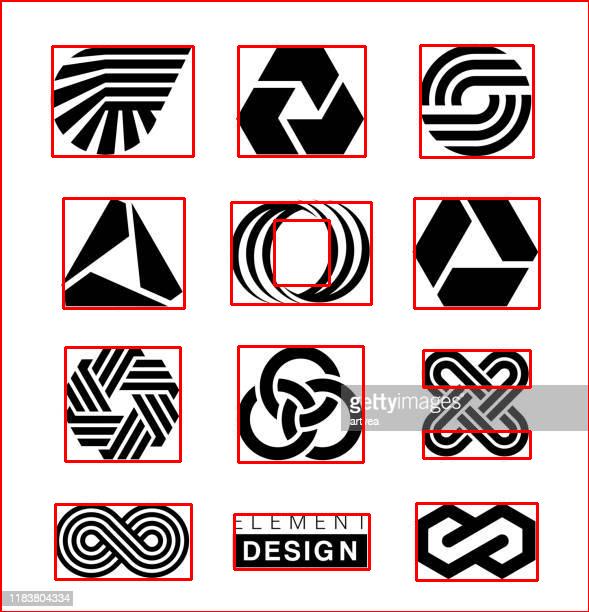

In [ ]:
# 利用正方形，將輪廓抓出來
# 練習
import cv2
import IPython.display as dp
import numpy as np
from google.colab.patches import cv2_imshow

m1= cv2.imread("logo.png",1)
# 讀取
m2= cv2.cvtColor(m1, cv2.COLOR_BGR2GRAY)
# 轉灰階
m2= cv2.inRange(m2, 180, 255)
# 轉黑白
m2= cv2.erode(m2, np.ones((50,30)))
# 侵蝕膨脹，使logo聚合


a, b= cv2.findContours(m2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for i in range(1,len(a), 1):
    cv2.drawContours(m2, a, i, 0, -1)
    # 使用填滿效果，獎圖像與文字空心部分填滿

m2= cv2.dilate(m2, np.ones((20,10)))
# 調整侵蝕圖案的大小，因為會影響後面畫框框的大小
a, b= cv2.findContours(m2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# 再畫一次框框

for i in range(0, len(a), 1):
    x,y,w,h= cv2.boundingRect(a[i])
    cv2.rectangle(m1, (x,y), (x+w,y+h), (0,0,255), 2)

print("侵蝕圖")
cv2_imshow(m2)
print("匡列原圖")
cv2_imshow(m1)



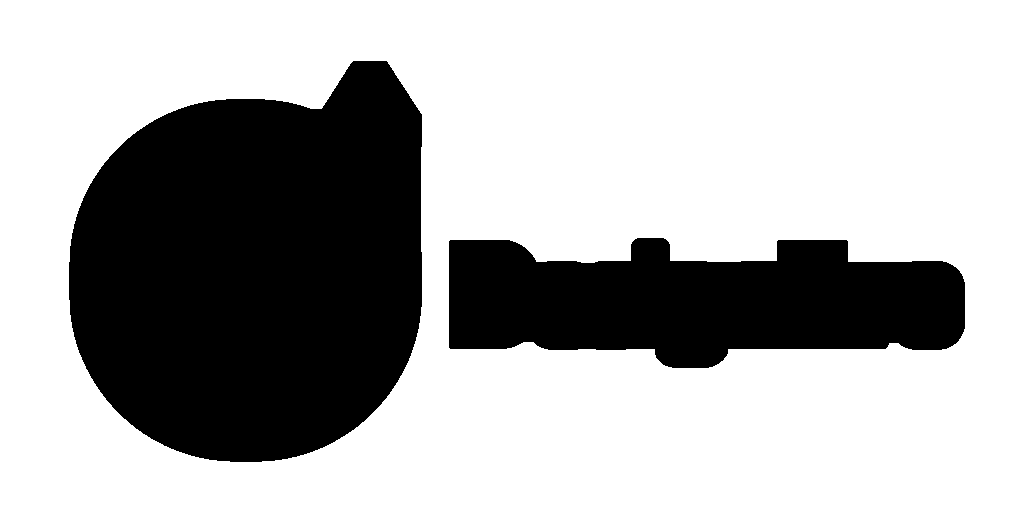
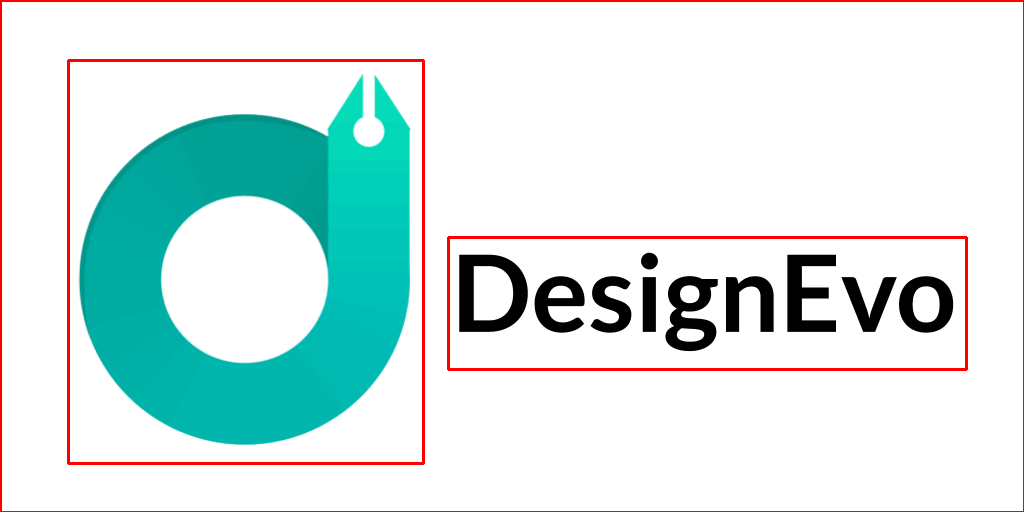

文字辨識

In [ ]:
!apt install tesseract-ocr
!pip install pytesseract
# 安裝套件

In [ ]:
import pytesseract as pt
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1= cv2.imread("logo.png",1)
# 讀取圖片,彩色

m2= cv2.inRange(m1, (0,0,0), (50,50,50))
# 將黑色選出並反白，其他都變黑色

text= pt.image_to_string(m2,"eng")
# 辨識結果=pt.image_to_string(圖片變數,語言包名稱)
print("辨識結果: ", text)


cv2_imshow(m2)
# m1將圖片也納入文字辨識，所以出現誤判

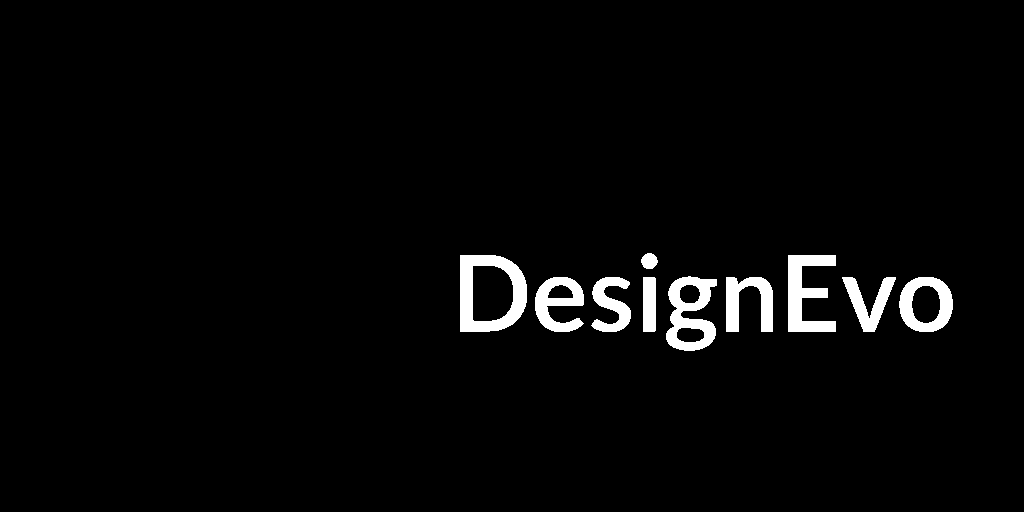

In [ ]:
import pytesseract as pt
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1= cv2.imread("text.jpg",1)

m2= cv2.inRange(m1, (0,0,0), (100,100,100))
m2= cv2.dilate(m2, np.ones((3,30)))

a,b= cv2.findContours(m2, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

for i in range(0, len(a), 1):
    x,y,w,h= cv2.boundingRect(a[i])
    cv2.rectangle(m1, (x,y), (x+w, y+h), (0,0,255), 2)
    # cv2_imshow(m1[y:y+h, x:x+w])
    # 將一行一行的文字化成圖片，可以提高辨識成功率

text= pt.image_to_string(m1,"eng")
print(text)

語言包

In [ ]:
# git: https://github.com/tesseract-ocr/tessdata
# 路徑: /usr/share/tesseract-ocr/4.00/tessdata/eng.traineddata

In [ ]:
# 自製語言包 (老師寫好的訓練code)
!python training.py

In [ ]:
import pytesseract as pt
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1= cv2.imread("my.png",1)
text= pt.image_to_string(m1,"my")
print("這是辨識出來的字體: ",text)
cv2_imshow(m1)

# 自創語言包，需要多次訓練

條碼偵測

In [ ]:
!apt install libzbar-dev
!pip install pyzbar

from pyzbar import pyzbar
import pytesseract as pt
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

# 結果變數= pyzbar.decode(圖像變數)
# 結果變數，為list，每個索引值指向一個條碼　可以同時辨識多個條碼

# 結果變數中，各個索引值的內容屬性
# type: 條碼類型
# rect: 包覆條碼的最小矩形資訊
# data: 結果文字

m1= cv2.imread("qrcode.png",1)

results= pyzbar.decode(m1) #可以同時辨識多個條碼，輸出資料為list

for r in results:
    print("條碼類型:", r.type)
    print("資料:", r.data.decode("utf-8"))
    x,y,w,h= r.rect # 矩陣資料
    cv2.rectangle(m1, (x,y), (x+w, y+h), (0,0,255), 2)
    print("=============================================")

cv2_imshow(m1)

In [ ]:
# 特例
# 純中文的qrcode 有可能辨識錯誤導致產生亂碼
# 因為此功能是日本人寫的，解法如下
from pyzbar import pyzbar
import pytesseract as pt
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow



m1= cv2.imread("self_qrcode.png",1)

results= pyzbar.decode(m1) #可以同時辨識多個條碼，輸出資料為list

for r in results:
    print("條碼類型:", r.type)
    try:
        print("資料:", r.data.decode("utf-8").encode("sjis").decode("utf-8"))
    except:
        print("資料:", r.data.decode("utf-8"))
    # 使用try & except 將兩種情況都納入考量。

    x,y,w,h= r.rect # 矩陣資料
    cv2.rectangle(m1, (x,y), (x+w, y+h), (0,0,255), 2)
    print("=============================================")

cv2_imshow(m1)

辨識

In [ ]:
# 分類器
# 控制變數= cv2.CasecadeClassifier(分類器文件)

# 辨識目標:
# 結果變數= 控制變數.detectMultiScale(
#    圖像變數,
#    minNeighbors= 檢測門檻數,   (辨識嚴苛程度)
#    minSize= 最小尺寸)
# 結果變數會是一個二維矩陣，第一維:每一個辨識到的目標 第二維:每一個目標的x座標,y座標,寬,高

In [ ]:
# 解壓縮官方的分類器文件
!unzip haarcascades

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1= cv2.imread("eyes.jpg",1)
# 讀取原圖

pic= cv2.CascadeClassifier("haarcascades/haarcascade_eye.xml")
# 篩選器
result= pic.detectMultiScale(m1, minNeighbors=5, minSize=(20,20))
# 對原圖使用篩選器

for x,y,w,h in result:
    cv2.rectangle(m1,(x,y), (x+w,y+h), (0,0,255), 2)
# 針對篩選結果，以矩形匡列

cv2_imshow(m1)

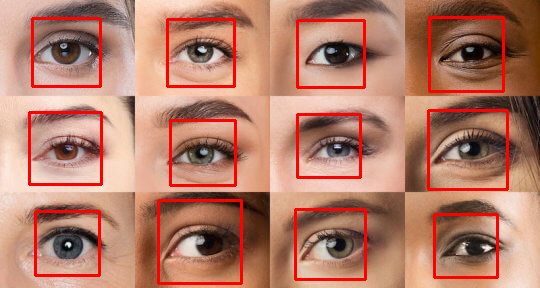